<a href="https://colab.research.google.com/github/DominicWanjala/DominicWanjala.github.io/blob/main/prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [52]:
#loading dataset
data = pd.read_csv('/content/predictive maintinace.csv')
#displaying the first twenty rows
data.head(20)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [53]:
#removing the uneccesary data
data=data.drop(['UDI','Product ID','TWF','HDF','PWF','OSF','RNF'],axis=1)
#setting up categorical data
data['Type']  = data['Type'].map({'M':0,'L':1,'H':2}).astype(float)
#displayingthe twenty rows
data.head(20)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,0.0,298.1,308.6,1551,42.8,0,0
1,1.0,298.2,308.7,1408,46.3,3,0
2,1.0,298.1,308.5,1498,49.4,5,0
3,1.0,298.2,308.6,1433,39.5,7,0
4,1.0,298.2,308.7,1408,40.0,9,0
5,0.0,298.1,308.6,1425,41.9,11,0
6,1.0,298.1,308.6,1558,42.4,14,0
7,1.0,298.1,308.6,1527,40.2,16,0
8,0.0,298.3,308.7,1667,28.6,18,0
9,0.0,298.5,309.0,1741,28.0,21,0


In [54]:
#Checking for duplicate values
duplicates= data[data['Process temperature [K]'].duplicated()]
duplicatespeed = data[data['Rotational speed [rpm]'].duplicated()]
duplicatetool= data[data['Tool wear [min]'].duplicated()]
duplicateair= data[data['Air temperature [K]'].duplicated()]
print(duplicates)
print(duplicatespeed)
print(duplicatetool)
print(duplicateair)

      Type  Air temperature [K]  Process temperature [K]  \
3      1.0                298.2                    308.6   
4      1.0                298.2                    308.7   
5      0.0                298.1                    308.6   
6      1.0                298.1                    308.6   
7      1.0                298.1                    308.6   
...    ...                  ...                      ...   
9995   0.0                298.8                    308.4   
9996   2.0                298.9                    308.4   
9997   0.0                299.0                    308.6   
9998   2.0                299.0                    308.7   
9999   0.0                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  
3                       1433         39.5                7                0  
4                       1408         40.0                9                0  
5                       1425         41.9    

In [55]:
#displaying the rowsand columns  present in the dataset
print(data.shape)
#checking the unique categories of data in the type column
data['Type'].unique()

(10000, 7)


array([0., 1., 2.])

In [56]:
#summury level of emptiness in the dataset
data.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [57]:
#specifying the features and target
X = data.drop(['Machine failure'],axis=1)
y = data['Machine failure']

In [58]:
#spliting the data into training and testing  data
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
#initializing the classifier
model = DecisionTreeClassifier()

In [60]:
#training the model
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
#making predictions
pred = model.predict(X_test)

In [62]:
#checking the accuracy of the model
accuracy = accuracy_score(pred,y_test)
accuracy

0.9725

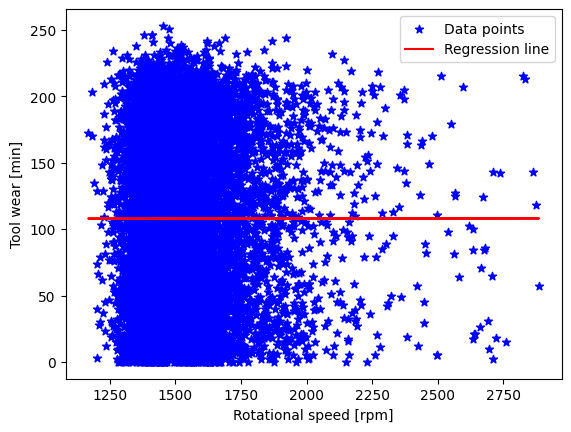

In [65]:
#plotting graph
y = data['Tool wear [min]']
x = data['Rotational speed [rpm]'].values.reshape(-1, 1)  # Reshape x to a 2D array
regressor = LinearRegression()
regressor.fit(x, y)

plt.scatter(x, y, color='blue', label='Data points',  marker='*')
plt.plot(x, regressor.predict(x), color='red', label='Regression line')
plt.ylabel('Tool wear [min]')
plt.xlabel('Rotational speed [rpm]')
plt.legend()
plt.show()
